<a href="https://colab.research.google.com/github/EtienneNoir/Deep_Learning/blob/main/IntroductionToDeepLearningX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Defining the different imports that will be used to create a network that will attempt to predict the numbers that are depcited in the inputs regardless of how they are written

In [2]:
from tensorflow.keras.models import Sequential # creating a sequential model that will have multiple layers arranged sequentially, one after the other
from tensorflow.keras.layers import Dense # Importing the extra layers that will be used to uncover patterns from the input and predict which class teh input belongs to
from tensorflow.keras.datasets import mnist # importing the mnist dataset that will be used to train and test the model
from tensorflow.keras.utils import to_categorical # to implmement one hot encoding, to converting the categorical labels into 1's and zero's. Thus one's and  zeros will be used to identify the different classes
from tensorflow.keras.layers.experimental.preprocessing import Normalization # to ensure that the pixel are all within the same rage, a range that the model can easily work with
import numpy as np # for number manipulation and rapid calculation
import matplotlib.pyplot as plt # for plotting or visialising the data
from tensorflow.keras.callbacks import EarlyStopping

#### Importing or extracting the mnsit dataset with all its 70000 images from the specified path

#### -  The dataset is split into 60 000 for training data and 10 000 as test data

#### - The images in the dataset are 28 x 28 grayscale each representing 10 of the different digits/classes

#### - It returns a Tuple of (x_train, y_train) , (x_test , y_test)

#### - The x_train and y_train contains images that are 28 by 28 with pixal values ranging from 0 - 255. Thus the shape is (28,28)

#### - y_test and y_train contains an array of digital labels that are mapped to the x dataset

#### - x_train contains 60000 observations or instances that are 28 by 28 grids

#### - y_train contains 10000 observations that are also 28 by 28

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist')

11490434/11490434 [==============================] - 0s 0us/step


#### The following is used to flatten the x data of both the training and the test set into 784 pixals like they are in one row which is a required format that a Sequetial neural network with *Dense* layers expect

In [4]:
x_train = x_train.reshape((x_train.shape[0], 784)) # changing the shape from (60000, 28 , 28 ) to (60000, 784) - flatten the image into one single row of 784 pixals
x_test  = x_test.reshape((x_test.shape[0] , 784)) # changing the shape from (10000, 28 , 28 ) to (10000, 784) - flatten the image into one single row of 784 pixlas thus each observation will be in this format

#### Normalising the input values to ensure that the pixals values are within a smaller range of values that the neural network can easily work with

In [5]:
normaliser = Normalization()
x_train = normaliser(x_train)
x_test  = normaliser(x_test)

#### Implementing One Hot encoding to identify the different classes using binaries instead of labels. This is done on the y dataset

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### Creating a Sequential model, with three different layers
#### - An input layers that will adjusted to except 784 pixals based images with un restrained amount of rows or observations which is denoted by , in the input layer

#### - The output layer consists of 10 neurons because that are 10 possible options are classes that the input is predicted as

In [51]:
model = Sequential()
model.add(Dense(110 , activation='relu', input_shape = (784,))) # activation relu is used to find non-linear patterns such as for example the curve of a mouth or eye, this is the input layer
model.add(Dense(50, activation='relu')) # Defining the second layer that will be used to aggregate bigger patterns from the previous layer that can be used to put together the possible image that the model is trying to predict
model.add(Dense(10 , activation='softmax')) # It converts the raw ouput score into probabilities or percentage score for each class to predict which class the input belongs to based on the class that has been assigned the highest percentage

#### Compiling the model so that it can be used, adam will be used to automatically perform gradient descent thus weight adjustments during training to find the optimal weights

#### - The model will also ruten the loss thus the percentage of how how far the prediction is from the actual answer

#### - The model will also return the accuracy score to indicate how many prediction will acturately predicted. In other words out of all the predictions made what is the percentage of all the predictions made that correspond to the memo ?

In [52]:
early_stopping_monitor = EarlyStopping(patience=2) # if the score of the model doesn't improve for the next two epochs then training will stop
model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

#### Now to actually train the model using the training set by supplying the model with teh questions and the answers so that it can adjust its weights to ensure that it improves its accuracy

### validation will 0.3 meaning that 30 percent of the training data in a specific epoch will be used as unseen data that will test the performance of teh model based on how its weight were adjusted in that epoch

### The model will be trained 10 times, in other words the training data will be passed to teh model 10 times ensuring that the model improves each time

In [53]:
#model.fit(x_train, y_train, validation_split = 0.3 , epochs = 10)
model.fit(x_train, y_train, validation_split=0.3, epochs=20, callbacks = [early_stopping_monitor]) #fitting using early stop

Epoch 1/20
1313/1313 [==============================] - 7s 4ms/step - loss: 2.2369 - accuracy: 0.8329 - val_loss: 0.5088 - val_accuracy: 0.8831
Epoch 2/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.3775 - accuracy: 0.9061 - val_loss: 0.3159 - val_accuracy: 0.9237
Epoch 3/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2574 - accuracy: 0.9323 - val_loss: 0.2722 - val_accuracy: 0.9307
Epoch 4/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1961 - accuracy: 0.9458 - val_loss: 0.2341 - val_accuracy: 0.9355
Epoch 5/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1602 - accuracy: 0.9538 - val_loss: 0.2003 - val_accuracy: 0.9502
Epoch 6/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1435 - accuracy: 0.9589 - val_loss: 0.2070 - val_accuracy: 0.9486
Epoch 7/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1266 - accuracy: 0.9640 - val_loss: 0.1872 - val_accuracy:

#### Evaluating the model by providing it with unseen data to see how it will perform.

#### The model is given the unseen data and the memo which is used to mark or assess how the model performed



In [54]:
test_loss , test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1744 - accuracy: 0.9597


#### Printing the accuracy score and the loss value score

In [55]:
print(f"Test accuracy{(test_accuracy * 100): .2f}%")
print(f"Loss value: {test_loss * 100}")

Test accuracy 95.97%
Loss value: 17.44026392698288


#### Now to assess how the model will do when one single image is passed to it

In [12]:
((x_train2, y_train2) , (x_test2 , y_test2) )= mnist.load_data(path='mnsit')

11490434/11490434 [==============================] - 0s 0us/step


#### Retrieving a single image from the x_test as well as its answer and reshapping it as well as required by Dense layer

In [13]:
singleImage = x_test2[0]
singleImageAnswer2 = y_test2[0]

#### Reshapping the single image by flattining it

In [14]:
singleImage = singleImage.reshape(1, 784) # Take the single image which is one observation and convert it to a single array

##### Predict what the unseen single Image is

In [15]:
prediction = model.predict(singleImage)

1/1 [==============================] - 0s 102ms/step


##### Retrieving the class with the highest probability that is given to teh input

In [16]:
label = np.argmax(prediction)

#printing the label
print(f"The unseen input image is classified as a:  {label}")

The unseen input image is classified as a:  7


#### using plt.imshow to display images, the input image

#### First the input image is converted back to its original shape so that it can actuall be displayed as it was

Text(0.5, 1.0, 'The unseen input image is classified as a:  7, and the actuall answer on the memo is 7')

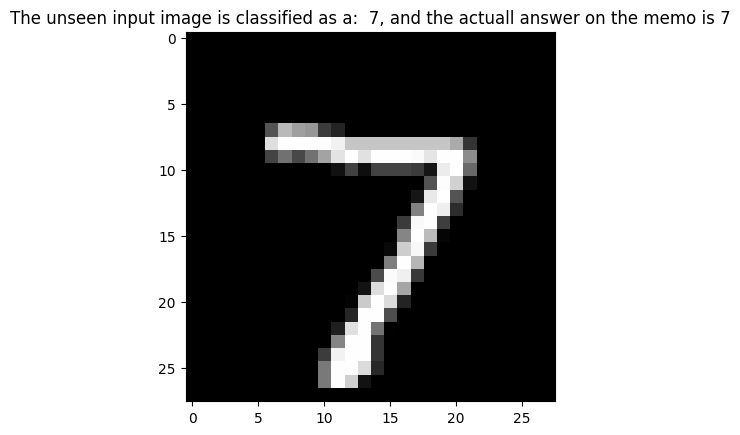

In [17]:
plt.imshow(singleImage.reshape(28,28), cmap='gray') # using gray so that it can be displayed in grayscale the same way it is stored in the dataset
plt.title(f"The unseen input image is classified as a:  {label}, and the actuall answer on the memo is {(singleImageAnswer2)}")

#### Implementing *Early Stopping* to indicate how many epochs the model can go without improving before before we stop for example of its 2 it means that if the score of the model does get better for the next 2 epochs then we will stop training, to save both time and comutational resources

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2) # if the score of the model doesn't improve for the next two epochs then training will stop

#### Fitting the model with early stopping

In [19]:
model.fit(x_train, y_train, validation_split=0.3, epochs=10, callbacks = [early_stopping_monitor])

Epoch 1/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0920 - accuracy: 0.9735 - val_loss: 0.1891 - val_accuracy: 0.9536
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0859 - accuracy: 0.9747 - val_loss: 0.1795 - val_accuracy: 0.9606
Epoch 3/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0807 - accuracy: 0.9774 - val_loss: 0.2023 - val_accuracy: 0.9553
Epoch 4/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.0798 - accuracy: 0.9769 - val_loss: 0.1741 - val_accuracy: 0.9626
Epoch 5/10
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0725 - accuracy: 0.9792 - val_loss: 0.2130 - val_accuracy: 0.9580
Epoch 6/10
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0700 - accuracy: 0.9803 - val_loss: 0.1780 - val_accuracy: 0.9641
